In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np

In [3]:
df1 = pd.read_csv("results/lua.csv")
df2 = pd.read_csv("results/bash.csv")
df = pd.concat([df1, df2])

In [4]:
def _get(mode, key=None):
    res = df[df["mode"] == mode].sort_values('benchmark')
    if key is not None:
        res = np.array(res[key])
    return res

def _scatterlr(ax, x, y, marker='.', label=''):
    filter = (np.array(x) < 4) & (np.array(y) < 4)
    lr = linregress(x[filter], y[filter])
    ax.scatter(x, y, marker=marker, label=label)
    ax.plot([0, 4], [lr.intercept, lr.intercept + 4 * lr.slope])
    print(label, lr.intercept, lr.slope)

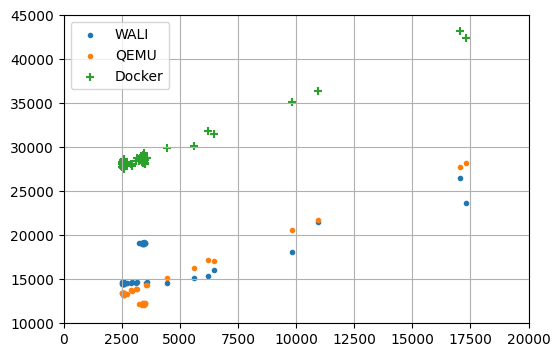

In [5]:
modes = {
    "wali": "WALI",
    "qemu": "QEMU"
}

fig, axs = plt.subplots(1, 1, figsize=(6, 4))

x = _get("native", "maxrss")
markers = ['.', '+', 'x']
for (name, label), marker in zip(modes.items(), markers):
    axs.scatter(x, _get(name, "maxrss"), marker='.', label=label)

y = _get("docker", "maxrss") + _get("docker-inner", "maxrss")
axs.scatter(x, y, marker='+', label="Docker")

# axs.plot([0, 5], [0, 5], linestyle='--', color='gray', label='Native')

axs.legend()
axs.set_xlim(0, 20000)
axs.set_ylim(10000, 45000)
axs.grid()
fig.savefig("scatter.pdf")

WALI 0.037590818541827886 2.689364068249031
Docker 0.47881686792979794 1.6794951767504656
QEMU -0.011025313332547304 11.325996226018031


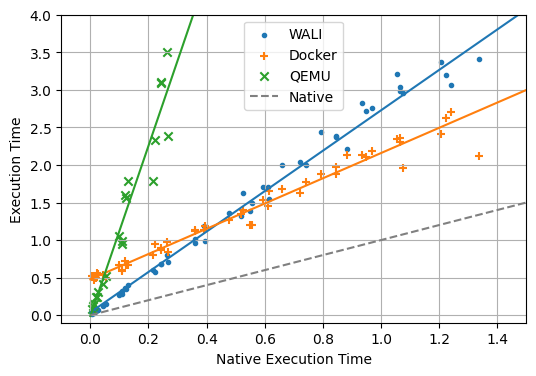

In [6]:
modes = {
    "wali": "WALI",
    # "docker-inner": "Docker -Launch",
    "docker": "Docker",
    "qemu": "QEMU"
}

fig, axs = plt.subplots(1, 1, figsize=(6, 4))
axs.set_xlabel("Native Execution Time")
axs.set_ylabel("Execution Time")


x = _get("native", "wall")
markers = ['.', '+', 'x', '1']
for (name, label), marker in zip(modes.items(), markers):
    _scatterlr(axs, x, _get(name, "wall"), marker=marker, label=label)

axs.plot([0, 5], [0, 5], linestyle='--', color='gray', label='Native')

axs.legend()
axs.set_xlim(-0.1, 1.5)
axs.set_ylim(-0.1, 4)
axs.set_xlabel("Native Execution Time")
axs.set_ylabel("Execution Time")
axs.grid()
fig.savefig("scatter.pdf")